In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [129]:
df = pd.read_csv("C:\\Users\\LENOVO\\email_datasets.csv",encoding='latin1')

In [130]:
df1 = pd.read_csv("C:\\Users\\LENOVO\\email_datasets.csv",encoding='latin1')

In [131]:
df2 = pd.read_csv("C:\\Users\\LENOVO\\email_datasets.csv",encoding='latin1')

In [132]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [134]:
df.shape

(5572, 2)

In [135]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [136]:
def func():
    pass
func()

In [137]:
df['Spam']= df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [138]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [139]:
final_df = df.drop(['Category'],axis=1)

In [140]:
final_df.head(3)

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [141]:
final_df['Message'] = [str(i) for i in df['Message']]

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
vectorizer = CountVectorizer()

In [144]:
X=vectorizer.fit_transform(final_df.Message)

In [145]:
print(X)

  (0, 3567)	1
  (0, 8081)	1
  (0, 4370)	1
  (0, 5953)	1
  (0, 2334)	1
  (0, 1313)	1
  (0, 5566)	1
  (0, 4110)	1
  (0, 1763)	1
  (0, 3651)	1
  (0, 8545)	1
  (0, 4497)	1
  (0, 1761)	1
  (0, 2057)	1
  (0, 7690)	1
  (0, 3611)	1
  (0, 1079)	1
  (0, 8321)	1
  (1, 5533)	1
  (1, 4533)	1
  (1, 4338)	1
  (1, 8447)	1
  (1, 5562)	1
  (2, 4110)	1
  (2, 3369)	1
  :	:
  (5570, 4241)	1
  (5570, 8368)	1
  (5570, 1094)	1
  (5570, 4638)	1
  (5570, 7084)	1
  (5570, 3319)	1
  (5570, 7670)	1
  (5570, 1447)	1
  (5570, 5363)	1
  (5570, 2602)	1
  (5570, 8117)	1
  (5570, 1790)	1
  (5570, 7094)	1
  (5570, 2901)	1
  (5570, 3485)	1
  (5570, 1798)	1
  (5570, 3705)	1
  (5570, 4184)	1
  (5570, 911)	1
  (5570, 1557)	1
  (5571, 7802)	1
  (5571, 5272)	1
  (5571, 4249)	2
  (5571, 7934)	1
  (5571, 6543)	1


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, final_df.Spam, test_size=0.20, random_state=42)

In [147]:
X_train.shape

(4457, 8707)

In [148]:
X_test.shape

(1115, 8707)

In [149]:
from sklearn.naive_bayes import BernoulliNB

In [150]:
model = BernoulliNB()

In [151]:
model.fit(X_train,y_train)

BernoulliNB()

In [152]:
model.score(X_test,y_test)

0.9829596412556054

In [153]:
emails = ['Hey mohan,can we get together to watch football game tomorrow?','Upto 20% discount on parking , exclusive offer just for you .Dont miss this offer','Rofl.Its true to its name Free']

In [154]:
e = vectorizer.transform(emails)

In [155]:
model.predict(e)

array([0, 0, 0], dtype=int64)

In [156]:
X_test

<1115x8707 sparse matrix of type '<class 'numpy.int64'>'
	with 14823 stored elements in Compressed Sparse Row format>

In [157]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [158]:
from sklearn.neighbors import KNeighborsClassifier

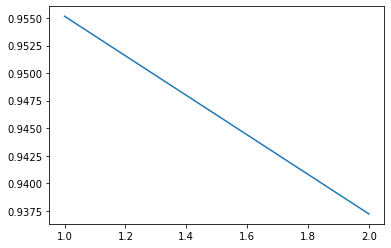

In [160]:
score_list =[]
for i in range(1,3):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test,y_test))
plt.plot(range(1,3),score_list)
plt.show()

In [162]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [163]:
model.score(X_test,y_test)

0.9856502242152466

In [164]:
emails = ['Hey mohan,can we get together to watch football game tomorrow?','Upto 20% discount on parking , exclusive offer just for you .Dont miss this offer','Rofl.Its true to its name Free']

In [165]:
e = vectorizer.transform(emails)

In [166]:
model.predict(e)

array([0, 1, 0], dtype=int64)

In [167]:
from sklearn.pipeline import Pipeline

In [176]:
clf =Pipeline([('Vectorizer',CountVectorizer()),('MM',MultinomialNB())])

In [177]:
X_train, X_test, y_train, y_test = train_test_split(final_df.Message, final_df.Spam, test_size=0.20, random_state=42)

In [178]:
clf.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('MM', MultinomialNB())])

In [179]:
clf.score(X_test,y_test)

0.9919282511210762

In [180]:
clf.predict(emails)

array([0, 1, 0], dtype=int64)

In [181]:
import seaborn as sns

In [182]:
y_pred = clf.predict(X_test)

In [183]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

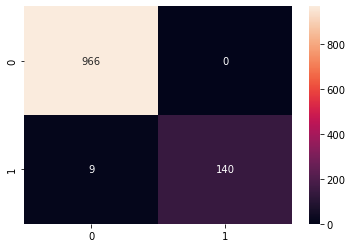

In [184]:
sns.heatmap(cm,annot=True,fmt='d')

In [186]:
cr=classification_report(y_test,y_pred)

In [187]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

